In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/credit_train.csv'

In [ ]:
df=pd.read_csv(dataset_path)

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
df.shape

(100514, 19)

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.isnull().sum()

,0
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


In [ ]:
df.dtypes
df.drop(['Customer ID'],axis=1,inplace=True)
df.drop(['Loan ID'],axis=1,inplace=True)


In [ ]:
unique_values = df['Loan Status'].unique()
print("Unique values in 'Loan status':", unique_values)

status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0
}

df['Loan Status'] = df['Loan Status'].map(status_mapping)

df.head()

Unique values in 'Loan status': ['Fully Paid' 'Charged Off' nan]


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df = df.dropna(subset=['Loan Status'])

In [ ]:
df[['Credit Score', 'Loan Status']].corr()

,Credit Score,Loan Status
Credit Score,1.000000,-0.467328
Loan Status,-0.467328,1.000000


In [ ]:
# df = df.dropna(subset=['Credit Score'])
# print(df.isnull().sum())
# # print(df['Months since last delinquent'].unique())
# # print((df['Months since last delinquent']==0).sum())
# print('*******************************************************')
# print(df.nunique())


mean_credit_score_approved = df[df['Loan Status'] == 1]['Credit Score'].mean()

mean_credit_score_not_approved = df[df['Loan Status'] == 0]['Credit Score'].mean()

df.loc[(df['Loan Status'] == 1) & (df['Credit Score'].isnull()), 'Credit Score'] = mean_credit_score_approved

df.loc[(df['Loan Status'] == 0) & (df['Credit Score'].isnull()), 'Credit Score'] = mean_credit_score_not_approved



In [ ]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,Short Term,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,Short Term,717.889874,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,Short Term,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,Long Term,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,Short Term,717.889874,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.dtypes

,0
Loan Status,float64
Current Loan Amount,float64
Term,object
Credit Score,float64
Annual Income,float64
Years in current job,object
Home Ownership,object
Purpose,object
Monthly Debt,float64
Years of Credit History,float64


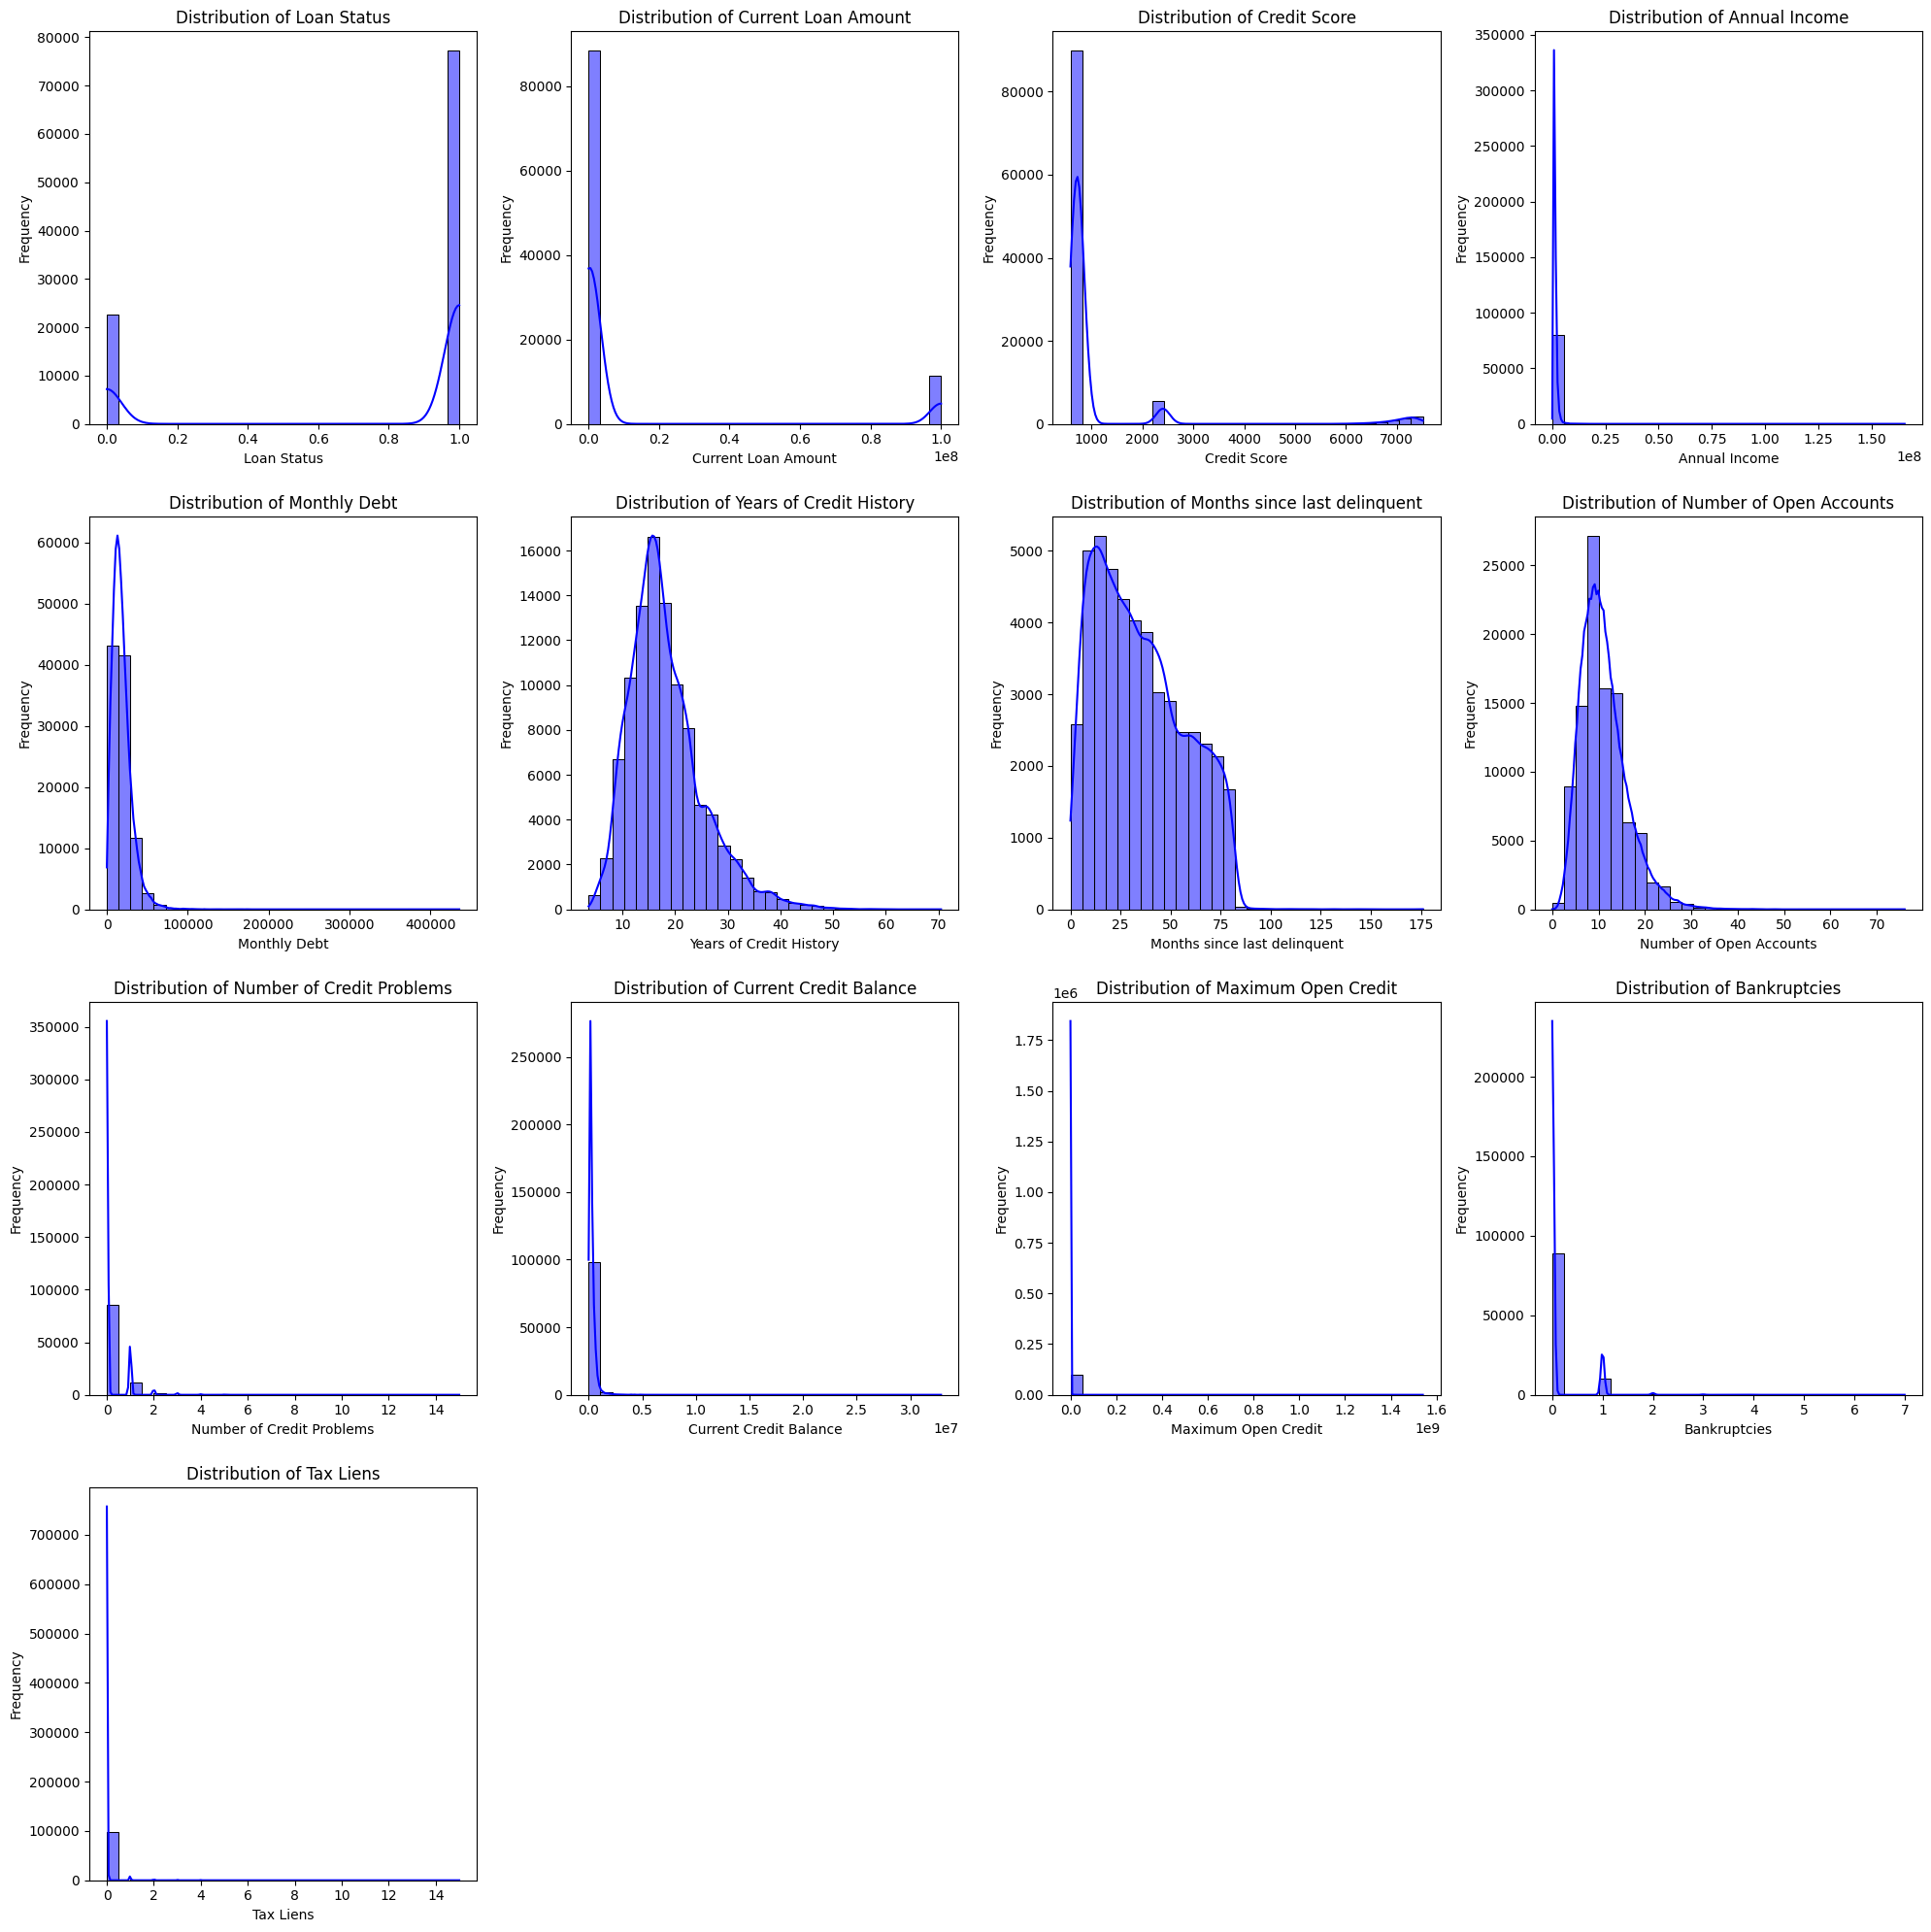

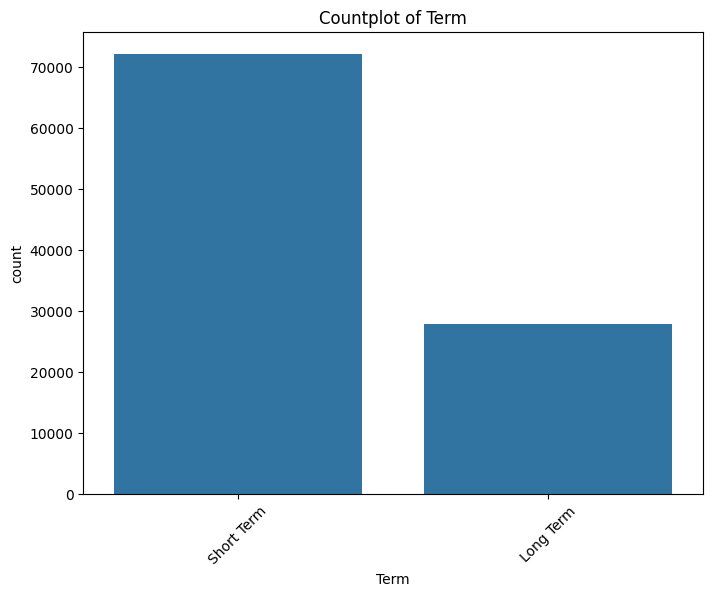

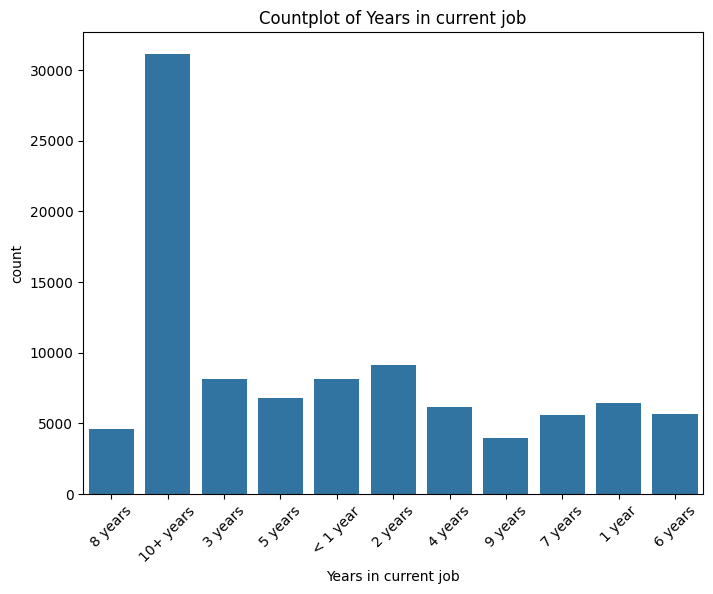

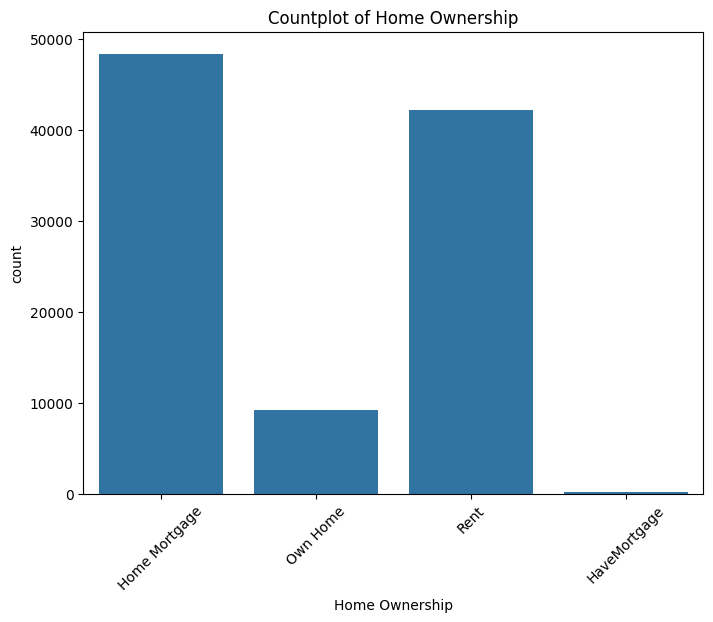

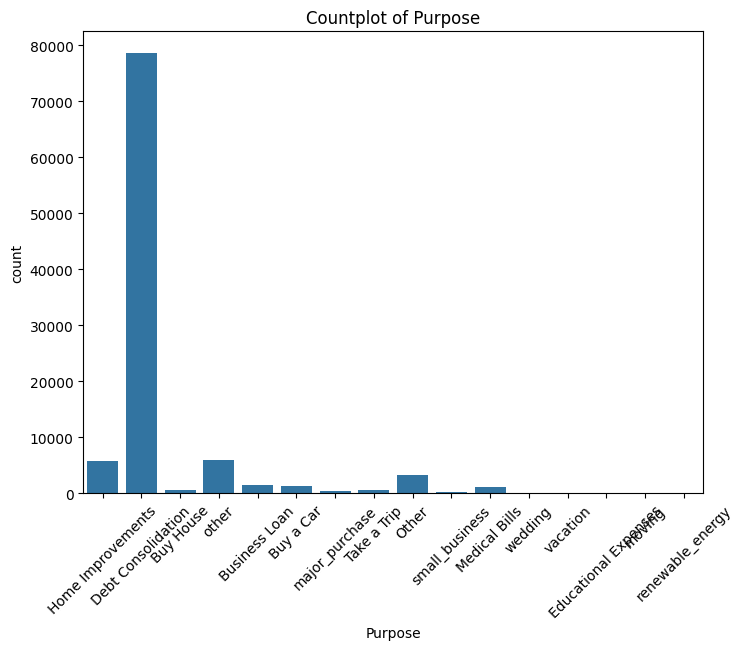

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [
    'Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
    'Monthly Debt', 'Years of Credit History', 'Months since last delinquent',
    'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

categorical_columns = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


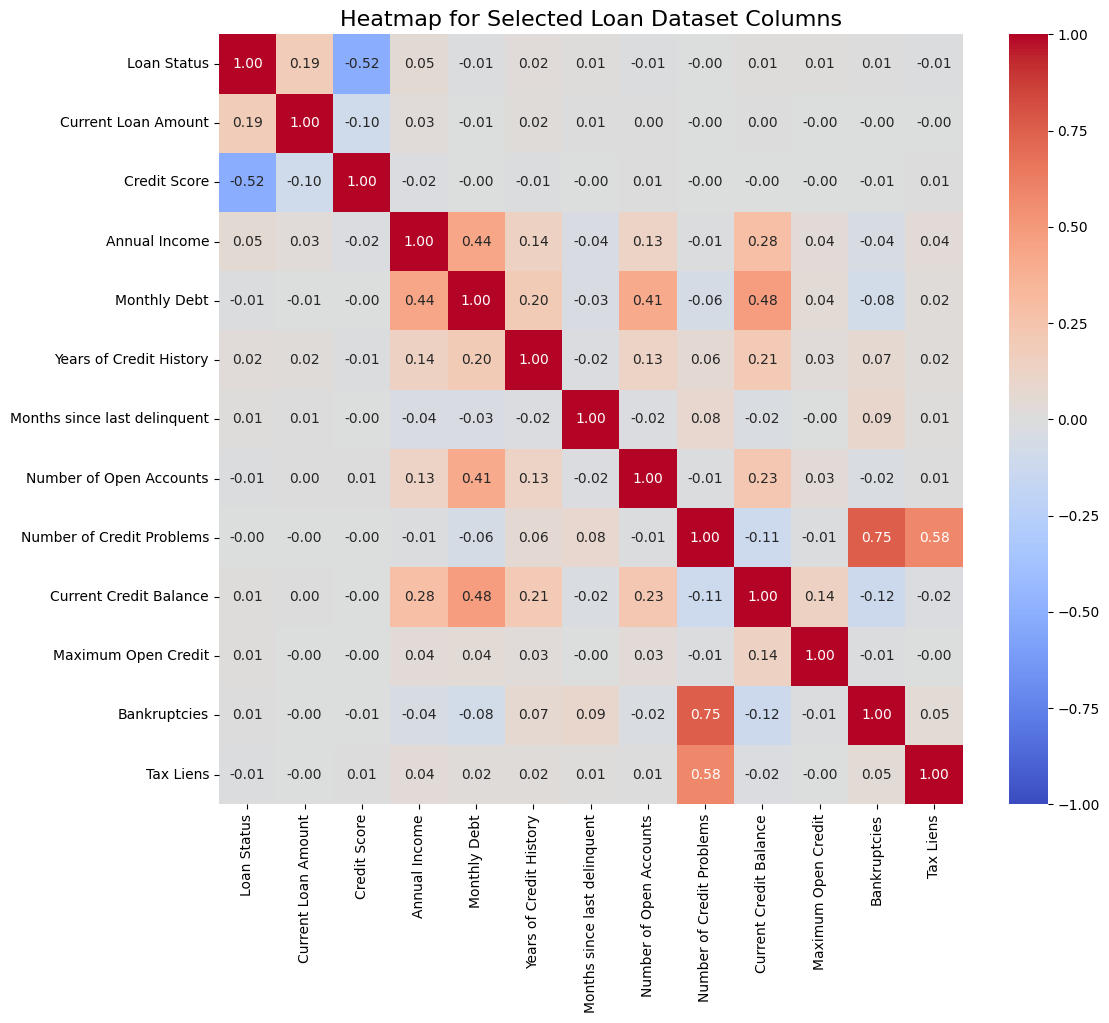

In [ ]:
columns = [
    'Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
    'Monthly Debt', 'Years of Credit History', 'Months since last delinquent',
    'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

df_filtered = df[columns]

df_cleaned = df_filtered.fillna(df_filtered.median())

correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1
)
plt.title("Heatmap for Selected Loan Dataset Columns", fontsize=16)
plt.show()

In [ ]:
purpose_counts = df['Purpose'].value_counts()
print(purpose_counts)

Purpose
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64


In [ ]:
print(f"Original shape: {df.shape}")
valid_purposes = purpose_counts[purpose_counts >= 100].index
df = df[df['Purpose'].isin(valid_purposes)]
print(f"Shape after filtering: {df.shape}")


Original shape: (100000, 17)
Shape after filtering: (99891, 17)


In [ ]:
ownership_counts = df['Home Ownership'].value_counts()
print(ownership_counts)

Home Ownership
Home Mortgage    48376
Rent             42129
Own Home          9172
HaveMortgage       214
Name: count, dtype: int64


In [ ]:
print(f"Original shape: {df.shape}")
valid_ownerships = ownership_counts[ownership_counts >= 200].index
df = df[df['Home Ownership'].isin(valid_ownerships)]
print(f"Shape after filtering: {df.shape}")


Original shape: (99891, 17)
Shape after filtering: (99891, 17)


In [ ]:
df.shape

(99891, 17)

In [ ]:
unique_values = df['Years in current job'].unique()
print("Unique values in 'Years in current job':", unique_values)
# mapping = {
#     '10+ years': 10,
#     '9 years': 9,
#     '8 years': 8,
#     '7 years': 7,
#     '6 years': 6,
#     '5 years': 5,
#     '4 years': 4,
#     '3 years': 3,
#     '2 years': 2,
#     '1 year': 1,
#     '< 1 year': 0.5
# }

# df['Years in current job'] = df['Years in current job'].map(mapping)
# df.head()

df = pd.get_dummies(df, columns=['Years in current job'], prefix='Years in current job', drop_first=True)

df.head()


Unique values in 'Years in current job': ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,...,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,1.0,445412.0,Short Term,709.000000,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,...,False,False,False,False,False,False,False,True,False,False
1,1.0,262328.0,Short Term,717.889874,NaN,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,...,True,False,False,False,False,False,False,False,False,False
2,1.0,99999999.0,Short Term,741.000000,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,...,False,False,False,False,False,False,False,True,False,False
3,1.0,347666.0,Long Term,721.000000,806949.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,...,False,False,True,False,False,False,False,False,False,False
4,1.0,176220.0,Short Term,717.889874,NaN,Rent,Debt Consolidation,20639.70,6.1,NaN,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# term_mapping = {
#     'Short Term': 0,
#     'Long Term': 1
# }

# df['Term'] = df['Term'].map(term_mapping)

# df.head()

df = pd.get_dummies(df, columns=['Term'], prefix='Term', drop_first=True)

df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Term_Short Term
0,1.0,445412.0,709.000000,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,...,False,False,False,False,False,False,True,False,False,True
1,1.0,262328.0,717.889874,NaN,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,...,False,False,False,False,False,False,False,False,False,True
2,1.0,99999999.0,741.000000,2231892.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,...,False,False,False,False,False,False,True,False,False,True
3,1.0,347666.0,721.000000,806949.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,...,False,True,False,False,False,False,False,False,False,False
4,1.0,176220.0,717.889874,NaN,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
unique_values = df['Home Ownership'].unique()
print("Unique values in 'Home Ownership':", unique_values)

# owner_mapping = {
#     'Home Mortgage':1,
#     'Own Home':2,
#      'Rent':3,
#      'HaveMortgage':4
# }

# df['Home Ownership'] = df['Home Ownership'].map(owner_mapping)

# df.head()

df = pd.get_dummies(df, columns=['Home Ownership'], prefix='Home Ownership', drop_first=True)

df.head()

Unique values in 'Home Ownership': ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1.0,445412.0,709.000000,1167493.0,Home Improvements,5214.74,17.2,NaN,6.0,1.0,...,False,False,False,True,False,False,True,True,False,False
1,1.0,262328.0,717.889874,NaN,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,...,False,False,False,False,False,False,True,True,False,False
2,1.0,99999999.0,741.000000,2231892.0,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,...,False,False,False,True,False,False,True,False,True,False
3,1.0,347666.0,721.000000,806949.0,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,1.0,176220.0,717.889874,NaN,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
unique_values = df['Purpose'].unique()
print("Unique values in 'Purpose':", unique_values)

# Purpose_mapping = {
#     'Home Mortgage':1,
#     'Own Home':2,
#      'Rent':3,
#      'HaveMortgage':4
# }

# df['Purpose'] = df['Purpose'].map(Purpose_mapping)

# df.head()

df = pd.get_dummies(df, columns=['Purpose'], prefix='Purpose', drop_first=True)

df.head()


Unique values in 'Purpose': ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation' 'moving']


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1.0,445412.0,709.000000,1167493.0,5214.74,17.2,NaN,6.0,1.0,228190.0,...,True,False,False,False,False,False,False,False,False,False
1,1.0,262328.0,717.889874,NaN,33295.98,21.1,8.0,35.0,0.0,229976.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,99999999.0,741.000000,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,...,False,False,False,False,False,False,False,False,False,False
3,1.0,347666.0,721.000000,806949.0,8741.90,12.0,NaN,9.0,0.0,256329.0,...,False,False,False,False,False,False,False,False,False,False
4,1.0,176220.0,717.889874,NaN,20639.70,6.1,NaN,15.0,0.0,253460.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.columns)

Index(['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Term_Short Term', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase',

In [ ]:
df.dtypes

,0
Loan Status,float64
Current Loan Amount,float64
Credit Score,float64
Annual Income,float64
Monthly Debt,float64
Years of Credit History,float64
Months since last delinquent,float64
Number of Open Accounts,float64
Number of Credit Problems,float64
Current Credit Balance,float64


In [ ]:
mean_annual_approved = df[df['Loan Status'] == 1]['Annual Income'].mean()

mean_annual_not_approved = df[df['Loan Status'] == 0]['Annual Income'].mean()

df.loc[(df['Loan Status'] == 1) & (df['Annual Income'].isnull()), 'Annual Income'] = mean_annual_approved

df.loc[(df['Loan Status'] == 0) & (df['Annual Income'].isnull()), 'Annual Income'] = mean_annual_not_approved

In [ ]:
print(df.isnull().sum())

Loan Status                           0
Current Loan Amount                   0
Credit Score                          0
Annual Income                         0
Monthly Debt                          0
Years of Credit History               0
Months since last delinquent      53083
Number of Open Accounts               0
Number of Credit Problems             0
Current Credit Balance                0
Maximum Open Credit                   2
Bankruptcies                        198
Tax Liens                             9
Years in current job_10+ years        0
Years in current job_2 years          0
Years in current job_3 years          0
Years in current job_4 years          0
Years in current job_5 years          0
Years in current job_6 years          0
Years in current job_7 years          0
Years in current job_8 years          0
Years in current job_9 years          0
Years in current job_< 1 year         0
Term_Short Term                       0
Home Ownership_Home Mortgage          0


In [ ]:
correlation = df['Months since last delinquent'].corr(df['Loan Status'])
print(f"Correlation between 'Months since last delinquent' and 'Loan Status': {correlation}")

Correlation between 'Months since last delinquent' and 'Loan Status': 0.013648753642806554


In [ ]:
df.drop(['Months since last delinquent'],axis=1,inplace=True)

In [ ]:
df.dropna(subset=['Bankruptcies'], inplace=True)

In [ ]:
df.dropna(subset=['Tax Liens'], inplace=True)

In [ ]:
df.dropna(subset=['Maximum Open Credit'], inplace=True)

In [ ]:
df.shape

(99691, 39)

In [ ]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1.0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,...,True,False,False,False,False,False,False,False,False,False
1,1.0,262328.0,717.889874,1.408456e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,...,False,False,False,False,False,False,False,False,False,False
3,1.0,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,...,False,False,False,False,False,False,False,False,False,False
4,1.0,176220.0,717.889874,1.408456e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.nunique()

,0
Loan Status,2
Current Loan Amount,21987
Credit Score,326
Annual Income,36099
Monthly Debt,65598
Years of Credit History,506
Number of Open Accounts,51
Number of Credit Problems,14
Current Credit Balance,32676
Maximum Open Credit,44511


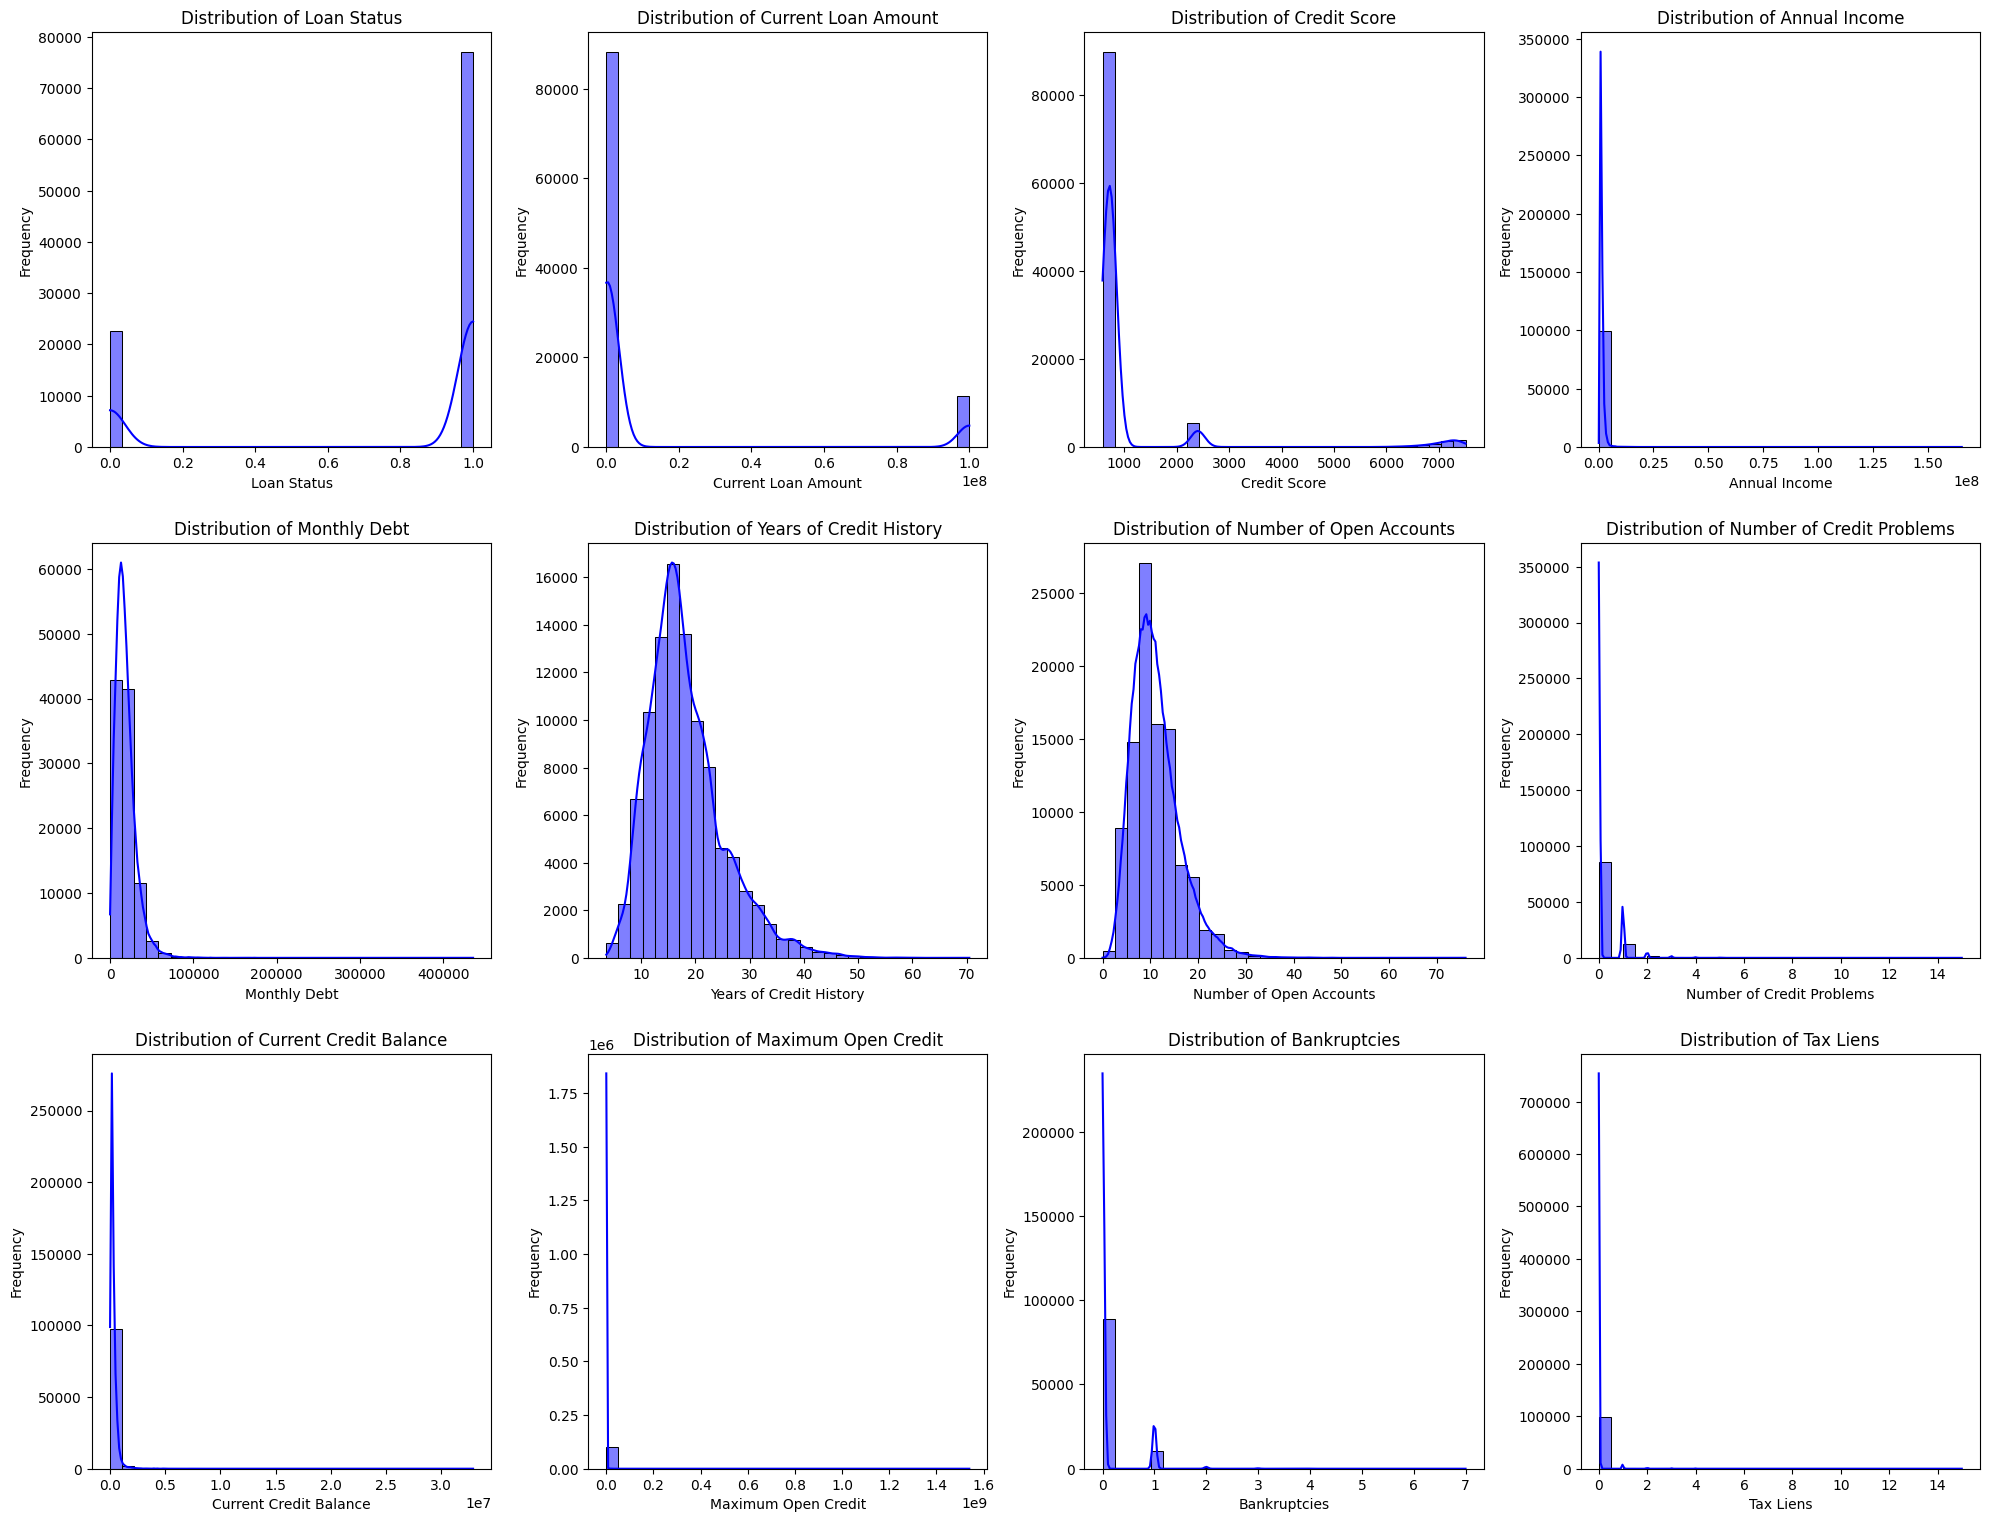

In [ ]:
numerical_columns = [
    'Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
    'Monthly Debt', 'Years of Credit History',
    'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# max_credit_score = df[df['Credit Score'] <= 1000]['Credit Score'].max()

# df['Credit Score'] = df['Credit Score'].apply(lambda x: max_credit_score if x > 1000 else x)

# print(df[df['Credit Score'] > 1000])


In [ ]:

def remove_outliers_std(df, columns, std_multiplier=5):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()

        lower_bound = mean - std_multiplier * std
        upper_bound = mean + std_multiplier * std

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

print(f"Original shape: {df.shape}")

df = remove_outliers_std(df, numerical_columns)

print(f"Shape after removing outliers: {df.shape}")


Original shape: (99691, 39)
Shape after removing outliers: (96068, 39)


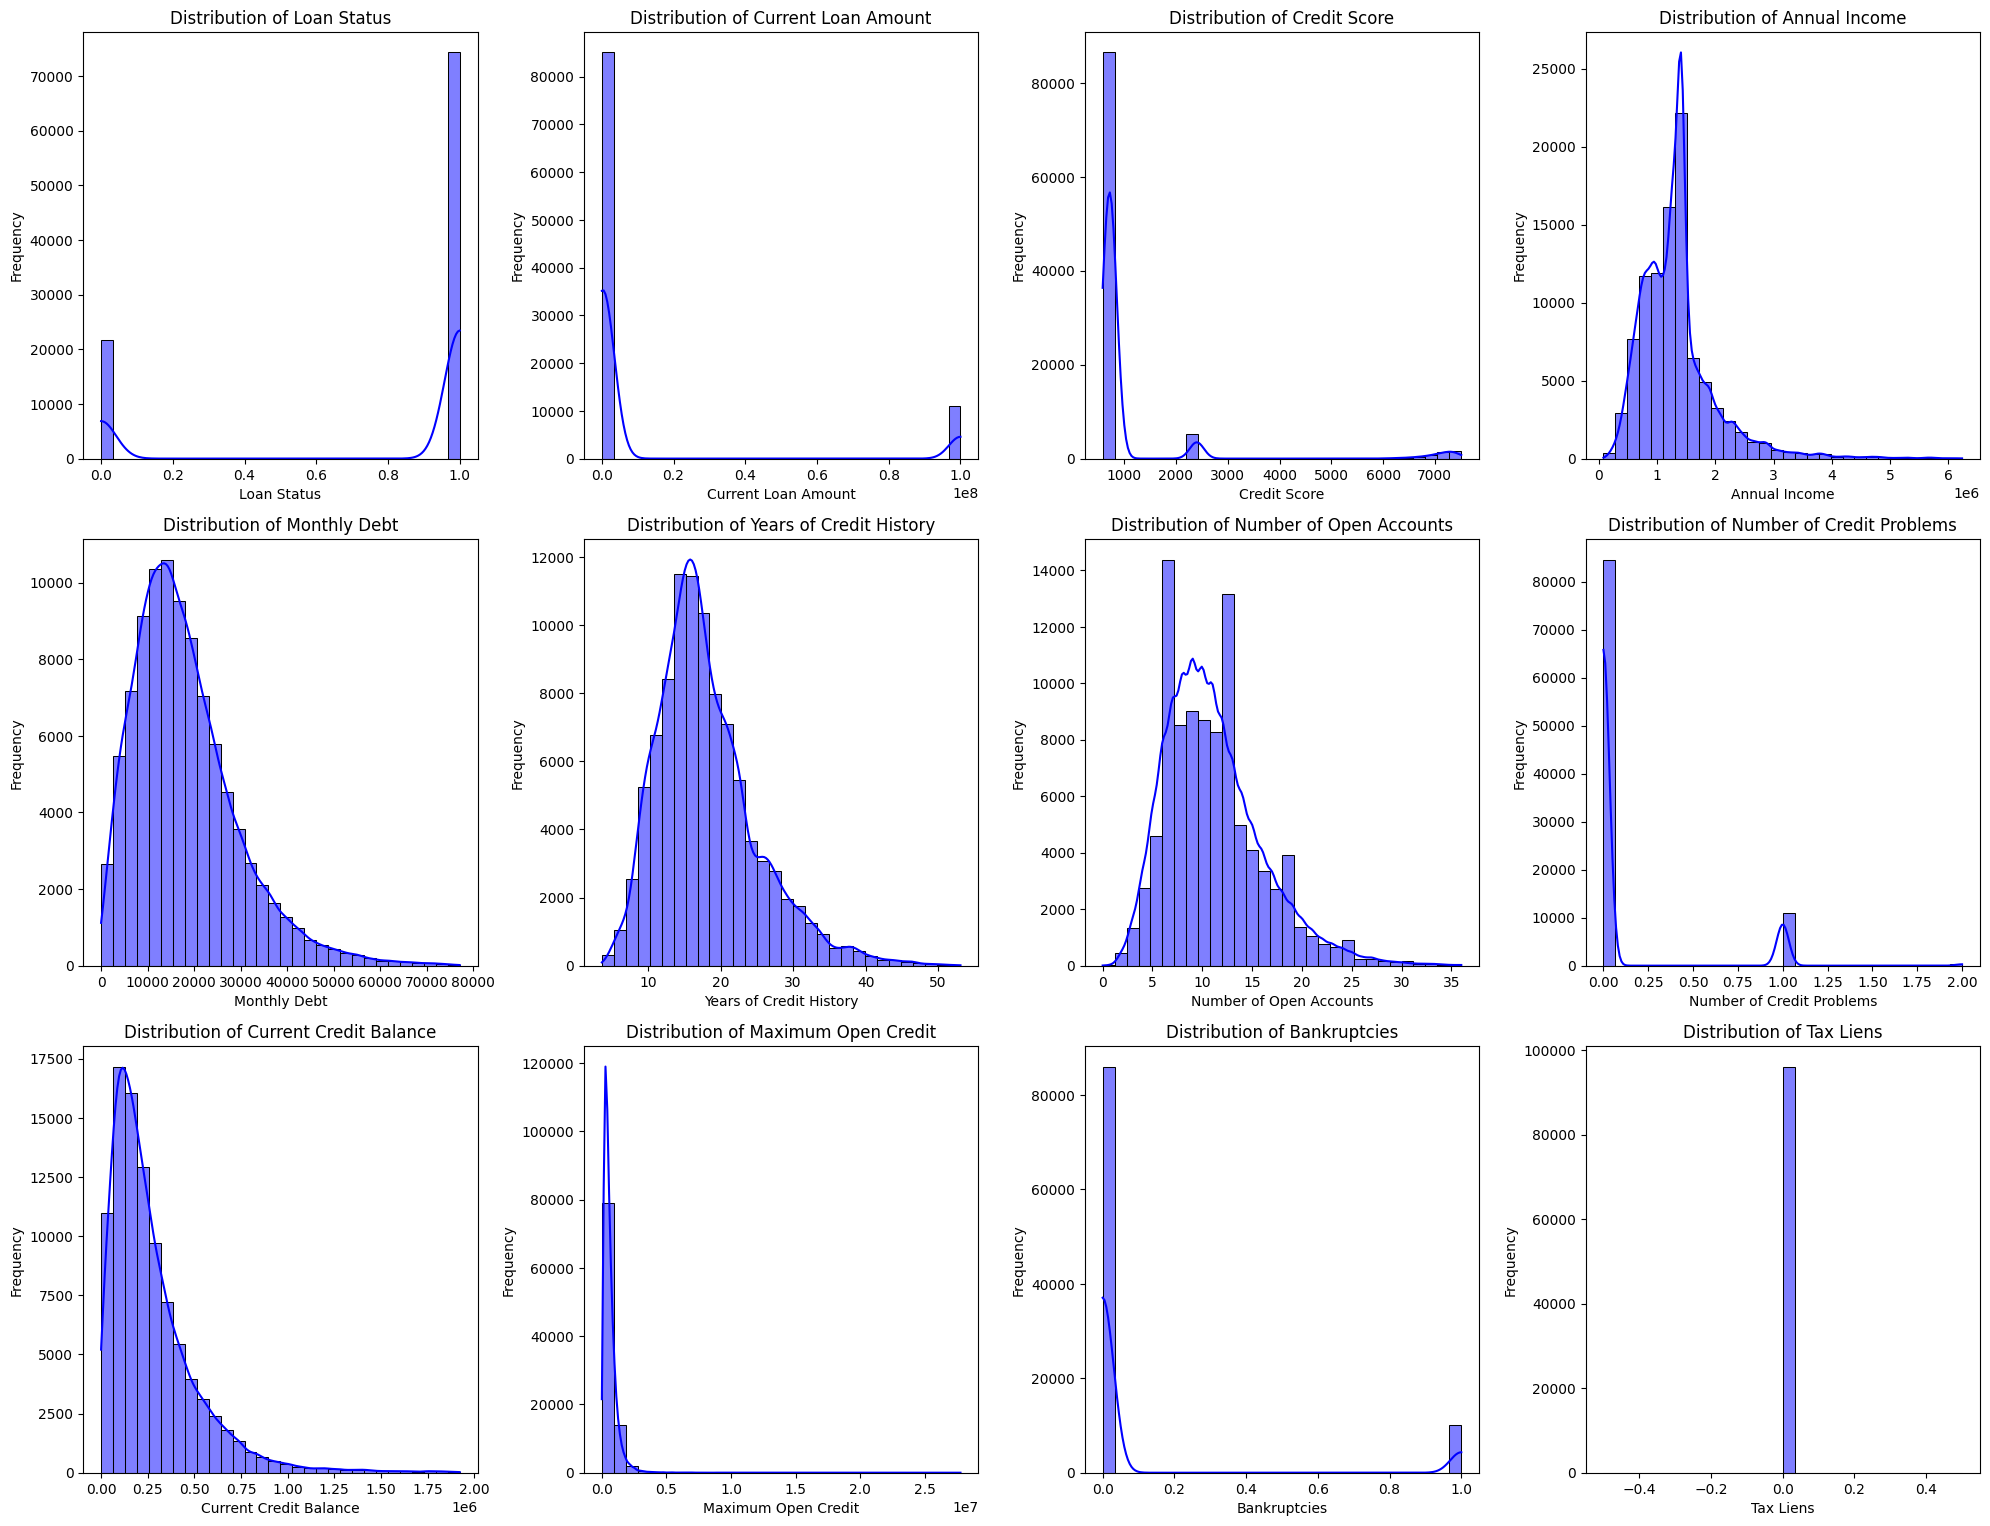

In [ ]:
numerical_columns = [
    'Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
    'Monthly Debt', 'Years of Credit History',
    'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [ ]:
X.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.606800e+04,96068.000000,9.606800e+04,96068.000000,96068.000000,96068.000000,96068.000000,9.606800e+04,9.606800e+04,96068.000000,96068.0
mean,1.172616e+07,1099.559611,1.338335e+06,18103.294486,18.094578,11.066089,0.122705,2.754761e+05,6.217404e+05,0.104749,0.0
std,3.174507e+07,1369.326795,6.480467e+05,11172.280902,6.943097,4.899561,0.339360,2.403756e+05,7.214159e+05,0.306231,0.0
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.793000e+05,711.000000,9.276940e+05,10166.520000,13.400000,8.000000,0.000000,1.132400e+05,2.736085e+05,0.000000,0.0
50%,3.106730e+05,721.000000,1.268138e+06,16117.605000,16.900000,10.000000,0.000000,2.097410e+05,4.666860e+05,0.000000,0.0
75%,5.204650e+05,741.000000,1.496744e+06,23754.607500,21.600000,14.000000,0.000000,3.641445e+05,7.744660e+05,0.000000,0.0
max,1.000000e+08,7510.000000,6.233672e+06,77096.680000,53.100000,36.000000,2.000000,1.922572e+06,2.777155e+07,1.000000,0.0


In [ ]:

scaler = StandardScaler()

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Data after scaling with StandardScaler:")
print(X.head())


Data after scaling with StandardScaler:
   Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0            -0.355356     -0.285222      -0.263628     -1.153625   
1            -0.361124     -0.278729       0.108204      1.359862   
2             2.780725     -0.261852       1.378853      0.993288   
3            -0.358435     -0.276458      -0.819986     -0.837917   
4            -0.363836     -0.278729       0.108204      0.227028   

   Years of Credit History  Number of Open Accounts  \
0                -0.128845                -1.033994   
1                 0.432867                 4.884935   
2                -0.460111                 1.415218   
3                -0.877794                -0.421691   
4                -1.727563                 0.802915   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                   2.585162               -0.196719            -0.284157   
1                  -0.361579               -0.189289        

In [ ]:
X.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Term_Short Term', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_other', 'Purpose_sm

In [ ]:
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,-0.355356,-0.285222,-0.263628,-1.153625,-0.128845,-1.033994,2.585162,-0.196719,-0.284157,2.923466,...,True,False,False,False,False,False,False,False,False,False
1,-0.361124,-0.278729,0.108204,1.359862,0.432867,4.884935,-0.361579,-0.189289,0.317493,-0.342060,...,False,False,False,False,False,False,False,False,False,False
2,2.780725,-0.261852,1.378853,0.993288,-0.460111,1.415218,2.585162,0.093687,0.177914,-0.342060,...,False,False,False,False,False,False,False,False,False,False
3,-0.358435,-0.276458,-0.819986,-0.837917,-0.877794,-0.421691,-0.361579,-0.079655,-0.325448,-0.342060,...,False,False,False,False,False,False,False,False,False,False
4,-0.363836,-0.278729,0.108204,0.227028,-1.727563,0.802915,-0.361579,-0.091591,-0.269702,-0.342060,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 87.35%
Confusion Matrix:
[[ 2902  3641]
 [    6 22272]]


In [ ]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov_matrix = np.cov(X, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


n_components = 11
pca = PCA(n_components=n_components)
X_train_numeric = X_train.select_dtypes(include=np.number).astype(np.float64)
pca.fit(X_train_numeric.values)
X_train_pca = pca.transform(X_train_numeric.values)

X_test_numeric = X_test.select_dtypes(include=np.number).astype(np.float64)
X_test_pca = pca.transform(X_test_numeric.values)

print(f"Transformed X_train shape: {X_train_pca.shape}")
print(f"Transformed X_test shape: {X_test_pca.shape}")

Transformed X_train shape: (67247, 11)
Transformed X_test shape: (28821, 11)


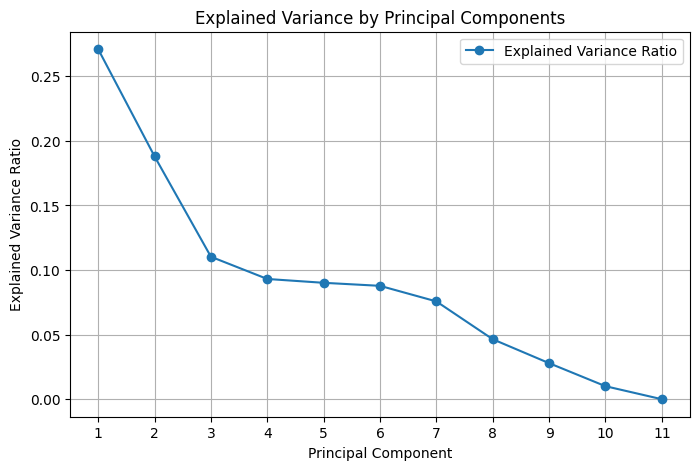

In [ ]:
import matplotlib.pyplot as plt

# Calculate explained variance
eigenvalues = np.var(X_train_pca, axis=0)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend()
plt.show()

Accuracy of custom logistic regression: 83.19%


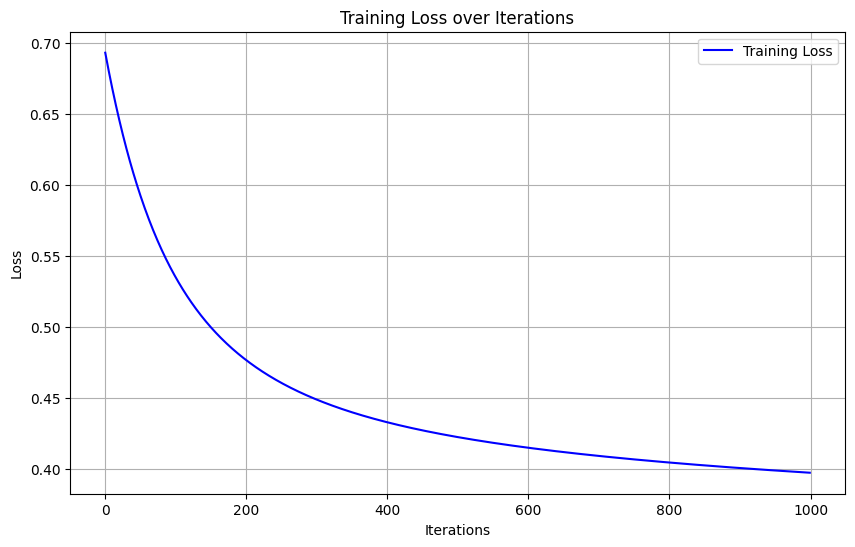

In [ ]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        X = X.astype(np.float64)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = - (1 / n_samples) * np.sum(
                y * np.log(np.clip(y_predicted, 1e-15, 1 - 1e-15)) +
                (1 - y) * np.log(np.clip(1 - y_predicted, 1e-15, 1 - 1e-15))
            )
            self.losses.append(loss)
            # if iteration % 100 == 0:
            #     loss = - (1 / n_samples) * np.sum(
            #         y * np.log(np.clip(y_predicted, 1e-15, 1 - 1e-15)) +
            #         (1 - y) * np.log(np.clip(1 - y_predicted, 1e-15, 1 - 1e-15))
            #     )
            #     print(f"Loss at iteration {iteration}: {loss}")

    def predict(self, X):
        X = X.astype(np.float64)

        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)

    def _sigmoid(self, x):
        x = np.array(x, dtype=np.float64)

        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

custom_log_reg = LogisticRegressionCustom(learning_rate=0.01, n_iters=1000)
custom_log_reg.fit(X_train.values, y_train.values)
y_pred_log_reg = custom_log_reg.predict(X_test.values)
accuracy_log_reg = np.sum(y_pred_log_reg == y_test.values) / len(y_test)
accuracy_log_reg = round(accuracy_log_reg * 100, 2)
print(f"Accuracy of custom logistic regression: {accuracy_log_reg}%")

# Visualizing the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(custom_log_reg.n_iters), custom_log_reg.losses, label="Training Loss", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.grid()
plt.show()


SVM classification accuracy 81.74


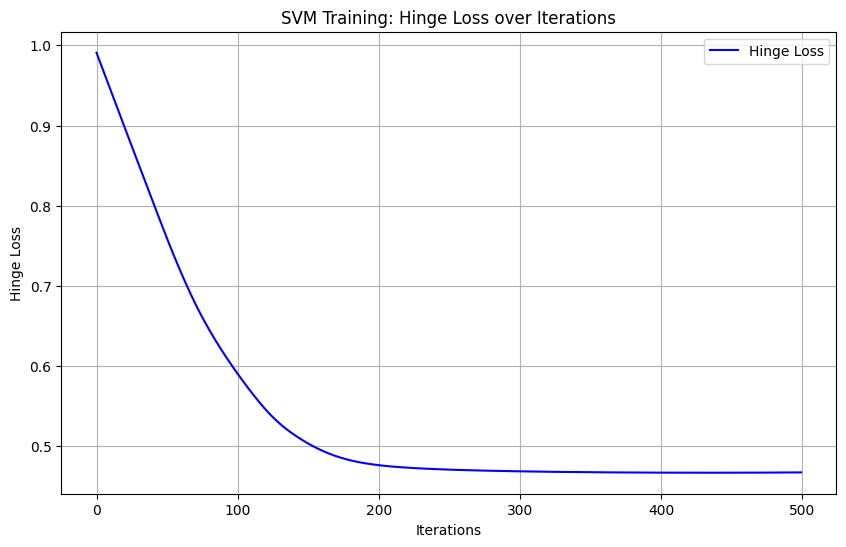

In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=500):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        X = X.astype(np.float64)
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.random.randn(n_features) * 0.01
        self.b = 0

        for iteration in range(self.n_iters):
            gradients_w = np.zeros_like(self.w)
            gradients_b = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    gradients_w += 2 * self.lambda_param * self.w
                else:
                    gradients_w += 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    gradients_b += -y_[idx]

            self.w -= self.lr * gradients_w / n_samples
            self.b -= self.lr * gradients_b / n_samples

            loss = self.hinge_loss(X, y_)
            self.losses.append(loss)
            # if iteration % 100 == 0:
            #     loss = self.hinge_loss(X, y_)
            #     print(f"Loss at iteration {iteration}: {loss}")

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        predictions = np.sign(approx)
        # Change here to convert -1 to 0
        predictions = np.where(predictions == -1, 0, predictions)
        return predictions

    def hinge_loss(self, X, y):
        loss = 0
        for idx, x_i in enumerate(X):
            loss += max(0, 1 - y[idx] * (np.dot(x_i, self.w) - self.b))
        loss /= len(X)
        return loss


svm = SVM()
svm.fit(X_train.values, y_train.values)
y_pred_svm = svm.predict(X_test.values)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

accuracy_svm = accuracy(y_test, y_pred_svm)
accuracy_svm = round(accuracy_svm * 100, 2)
print("SVM classification accuracy", accuracy_svm)

plt.figure(figsize=(10, 6))
plt.plot(range(svm.n_iters), svm.losses, label="Hinge Loss", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Hinge Loss")
plt.title("SVM Training: Hinge Loss over Iterations")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.prior = None
        self.likelihood = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.prior = np.zeros(len(self.classes))
        self.likelihood = {}
        n_samples, n_features = X.shape

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.prior[i] = len(X_c) / len(X)

            for j in range(n_features):
                if j not in self.likelihood:
                    self.likelihood[j] = {}

                values = np.unique(X[:, j])
                for v in values:
                    self.likelihood[j][(c, v)] = (np.sum(X_c[:, j] == v) + 1) / (len(X_c) + len(values))

    def _calculate_loss(self, X, y):
        n_samples = X.shape[0]
        loss = 0
        for i, x in enumerate(X):
            true_class = y[i]
            posterior_sum = 0
            for c in self.classes:
                posterior = self.prior[np.where(self.classes == c)[0][0]]
                for j in range(len(x)):
                    posterior *= self.likelihood[j].get((c, x[j]), 1e-9)
                posterior_sum += posterior

            true_posterior = self.prior[np.where(self.classes == true_class)[0][0]]
            for j in range(len(x)):
                true_posterior *= self.likelihood[j].get((true_class, x[j]), 1e-9)

            loss += -np.log(true_posterior / (posterior_sum + 1e-9))
        return loss / n_samples

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                posterior = self.prior[np.where(self.classes == c)[0][0]]
                for j in range(len(x)):
                    posterior *= self.likelihood[j].get((c, x[j]), 1e-9)
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)


nb = NaiveBayes()

chunk_size = 100
n_chunks = (len(X_train) + chunk_size - 1) // chunk_size
for i in range(n_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(X_train))
    X_chunk, y_chunk = X_train.values[start:end], y_train.values[start:end]
    nb.fit(X_chunk, y_chunk)

    # if i % 100 == 0 or i == n_chunks - 1:
    #     loss = nb._calculate_loss(X_train.values, y_train.values)
    #     print(f"Loss at iteration {i}: {loss:.4f}")

y_pred_nb = nb.predict(X_test.values)

accuracy_nb = np.sum(y_pred_nb == y_test.values) / len(y_test)
accuracy_nb = round(accuracy_nb * 100, 2)
print(f"Accuracy of Naive Bayes: {accuracy_nb}%")


Accuracy of Naive Bayes: 78.76%


In [ ]:
import numpy as np

class EnsembleModel:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        predictions = predictions.T

        predictions = np.clip(predictions, 0, 1)

        predictions = predictions.astype(int)

        y_pred = [np.bincount(row).argmax() for row in predictions]
        return np.array(y_pred)

ensemble = EnsembleModel(models=[svm, log_reg, nb])

y_pred_ensemble = ensemble.predict(X_test.values)

accuracy_ensemble = np.sum(y_pred_ensemble == y_test.values) / len(y_test)
accuracy_ensemble = round(accuracy_ensemble * 100, 2)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}%")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Ensemble Model Accuracy: 86.53%


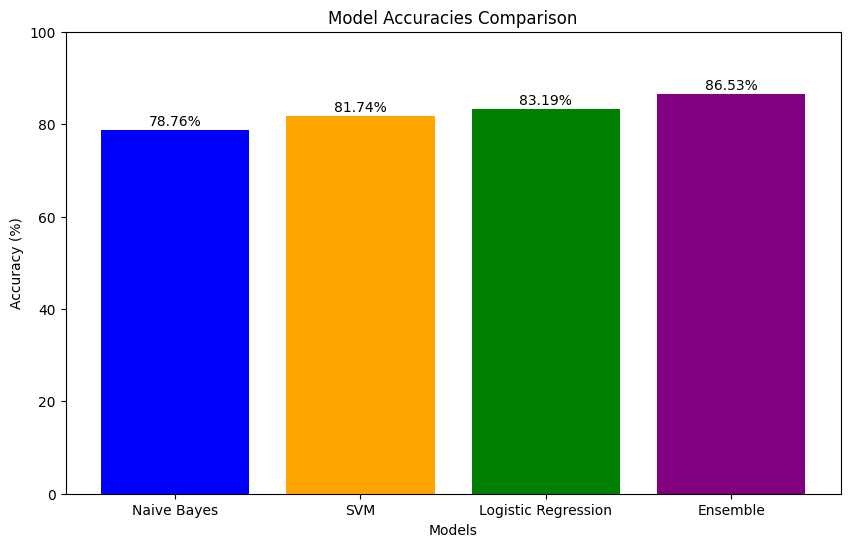

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes','SVM','Logistic Regression', 'Ensemble']
accuracies = [accuracy_nb,accuracy_svm,accuracy_log_reg, accuracy_ensemble]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10, color='black')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Evaluate SVM
y_pred_svm_fixed = np.clip(y_pred_svm, 0, 1).astype(int)
evaluate_model(y_test.values, y_pred_svm_fixed, "SVM")

# Evaluate Logistic Regression
evaluate_model(y_test.values, y_pred_log_reg, "Logistic Regression")

# Evaluate Naive Bayes
evaluate_model(y_test.values, y_pred_nb, "Naive Bayes")

# Evaluate Ensemble
evaluate_model(y_test.values, y_pred_ensemble, "Ensemble Model")

# Display all metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.817390   0.801434  0.817390  0.801108
1  Logistic Regression  0.831893   0.861922  0.831893  0.790721
2          Naive Bayes  0.787620   0.761020  0.787620  0.763616
3       Ensemble Model  0.865307   0.872365  0.865307  0.846699
